<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install --upgrade statsmodels

**Definir o tamanho das figuras para todos os plots**

In [3]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## United States Macroeconomic Dataset

In [4]:
macro_data = sm.datasets.macrodata.load_pandas()

In [5]:
macro_data.data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [6]:
macro_data = macro_data.data

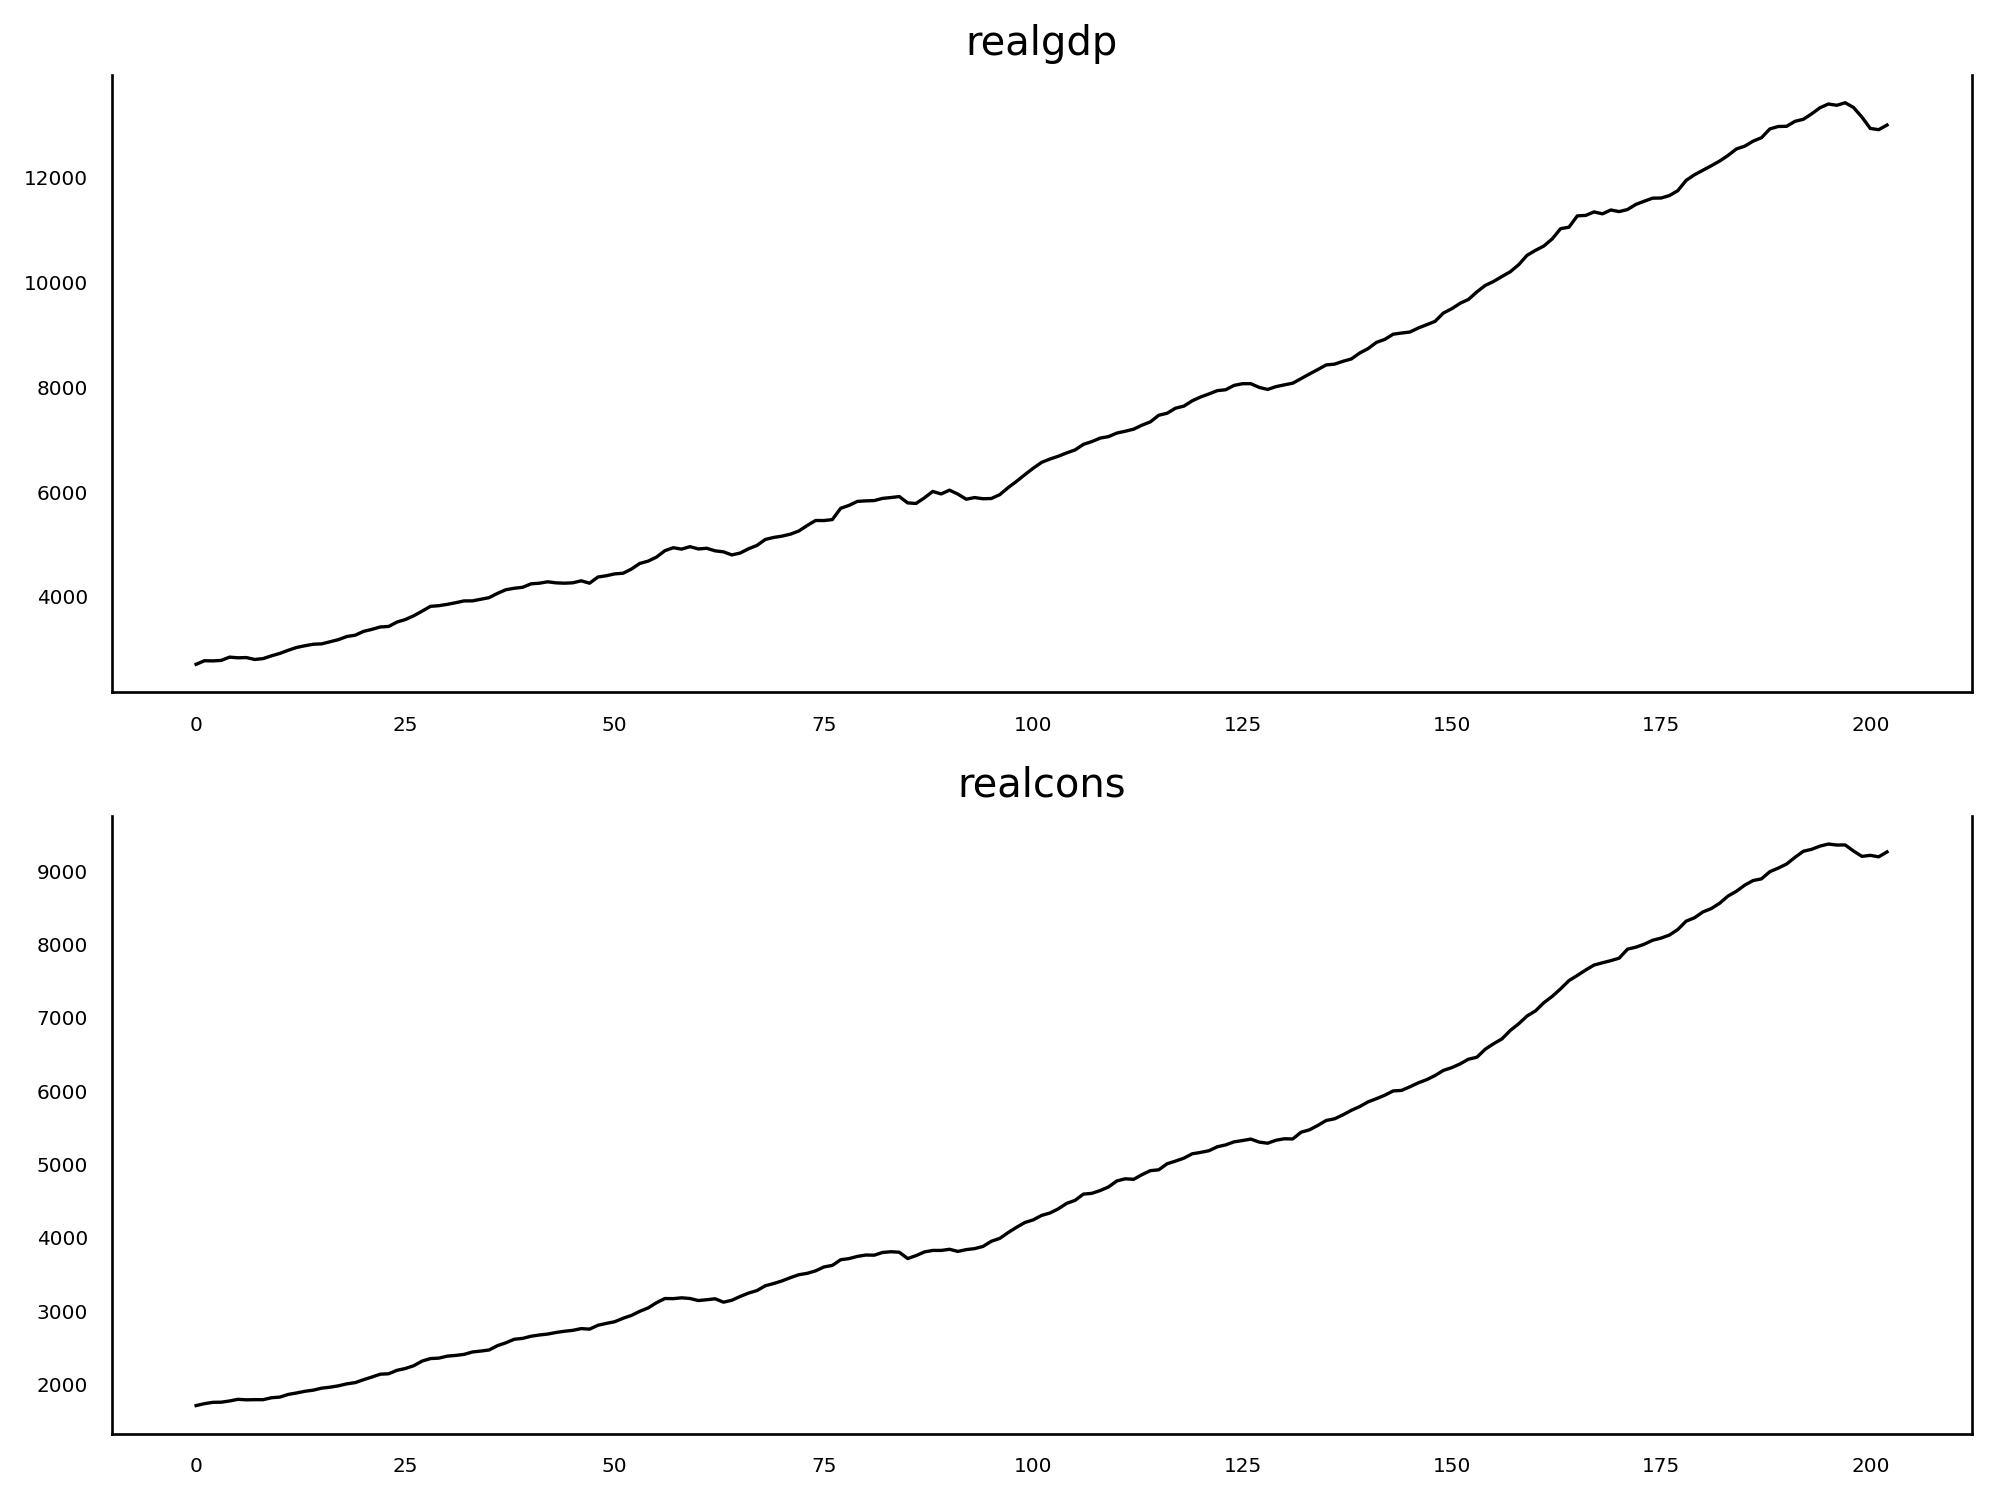

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=240)

ax1.plot(macro_data['realgdp'], color='black', linewidth=1)
ax1.set_title('realgdp')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(macro_data['realcons'], color='black', linewidth=1)
ax2.set_title('realcons')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

In [8]:
ad_fuller_result_1 = adfuller(macro_data['realgdp'].diff()[1:])
ad_fuller_result_2 = adfuller(macro_data['realcons'].diff()[1:])

In [9]:
print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'P-value: {ad_fuller_result_1[1]}')

print('\n---------------------------------\n')

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'P-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -6.305695561658106
P-value: 3.327882187668224e-08

---------------------------------

realcons
ADF Statistic: -4.204306080845247
P-value: 0.0006479282158627571


In [19]:
def optimize_VAR(endog):

  """
  Returns a dataframe with parameters ans corresponding MSE

  endog - observed time series
  """

  results = []

  for i in tqdm_notebook(range(15)):

    try:
      model = VARMAX(endog, order=(i, 0)).fit(disp=False)
    except:
      continue

    mse = model.mse

    results.append([i, mse])

  result_df = pd.DataFrame(results)
  result_df.columns = ['p', 'mse']
  result_df.sort_values(by='mse', inplace=True, ascending=True, ignore_index=True)

  return result_df

In [20]:
endog = macro_data[['realgdp', 'realcons']]
result_df = optimize_VAR(endog)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

,p,mse
0,1,3.710339e+07
1,2,6.057486e+06
2,3,2.877278e+05
3,4,1.921811e+05
4,5,1.849278e+05
5,6,1.718393e+05
6,7,1.683972e+05
7,8,1.631396e+05
8,9,1.631500e+05
9,10,1.642559e+05


In [21]:
best_model = VARMAX(endog, order=(12, 0))
res = best_model.fit(disp=False)
print(res.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realgdp', 'realcons']   No. Observations:                  203
Model:                             VAR(12)   Log Likelihood               -1983.674
                               + intercept   AIC                           4073.347
Date:                     Tue, 16 Aug 2022   BIC                           4248.947
Time:                             17:05:33   HQIC                          4144.388
Sample:                                  0                                         
                                     - 203                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.13, 0.14   Jarque-Bera (JB):           5.29, 9.84
Prob(Q):                        0.71, 0.71   Prob(JB):                   0.07, 0.01
Heteroskedasticity (H):         1.72, 2.57   Skew:                       0.3

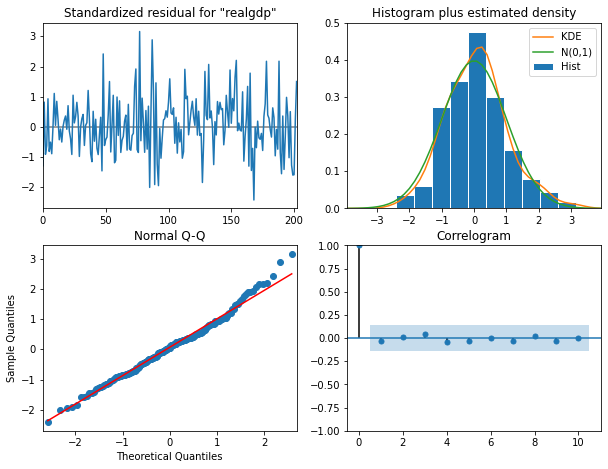

In [22]:
res.plot_diagnostics();

In [23]:
n_forecast = 3
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

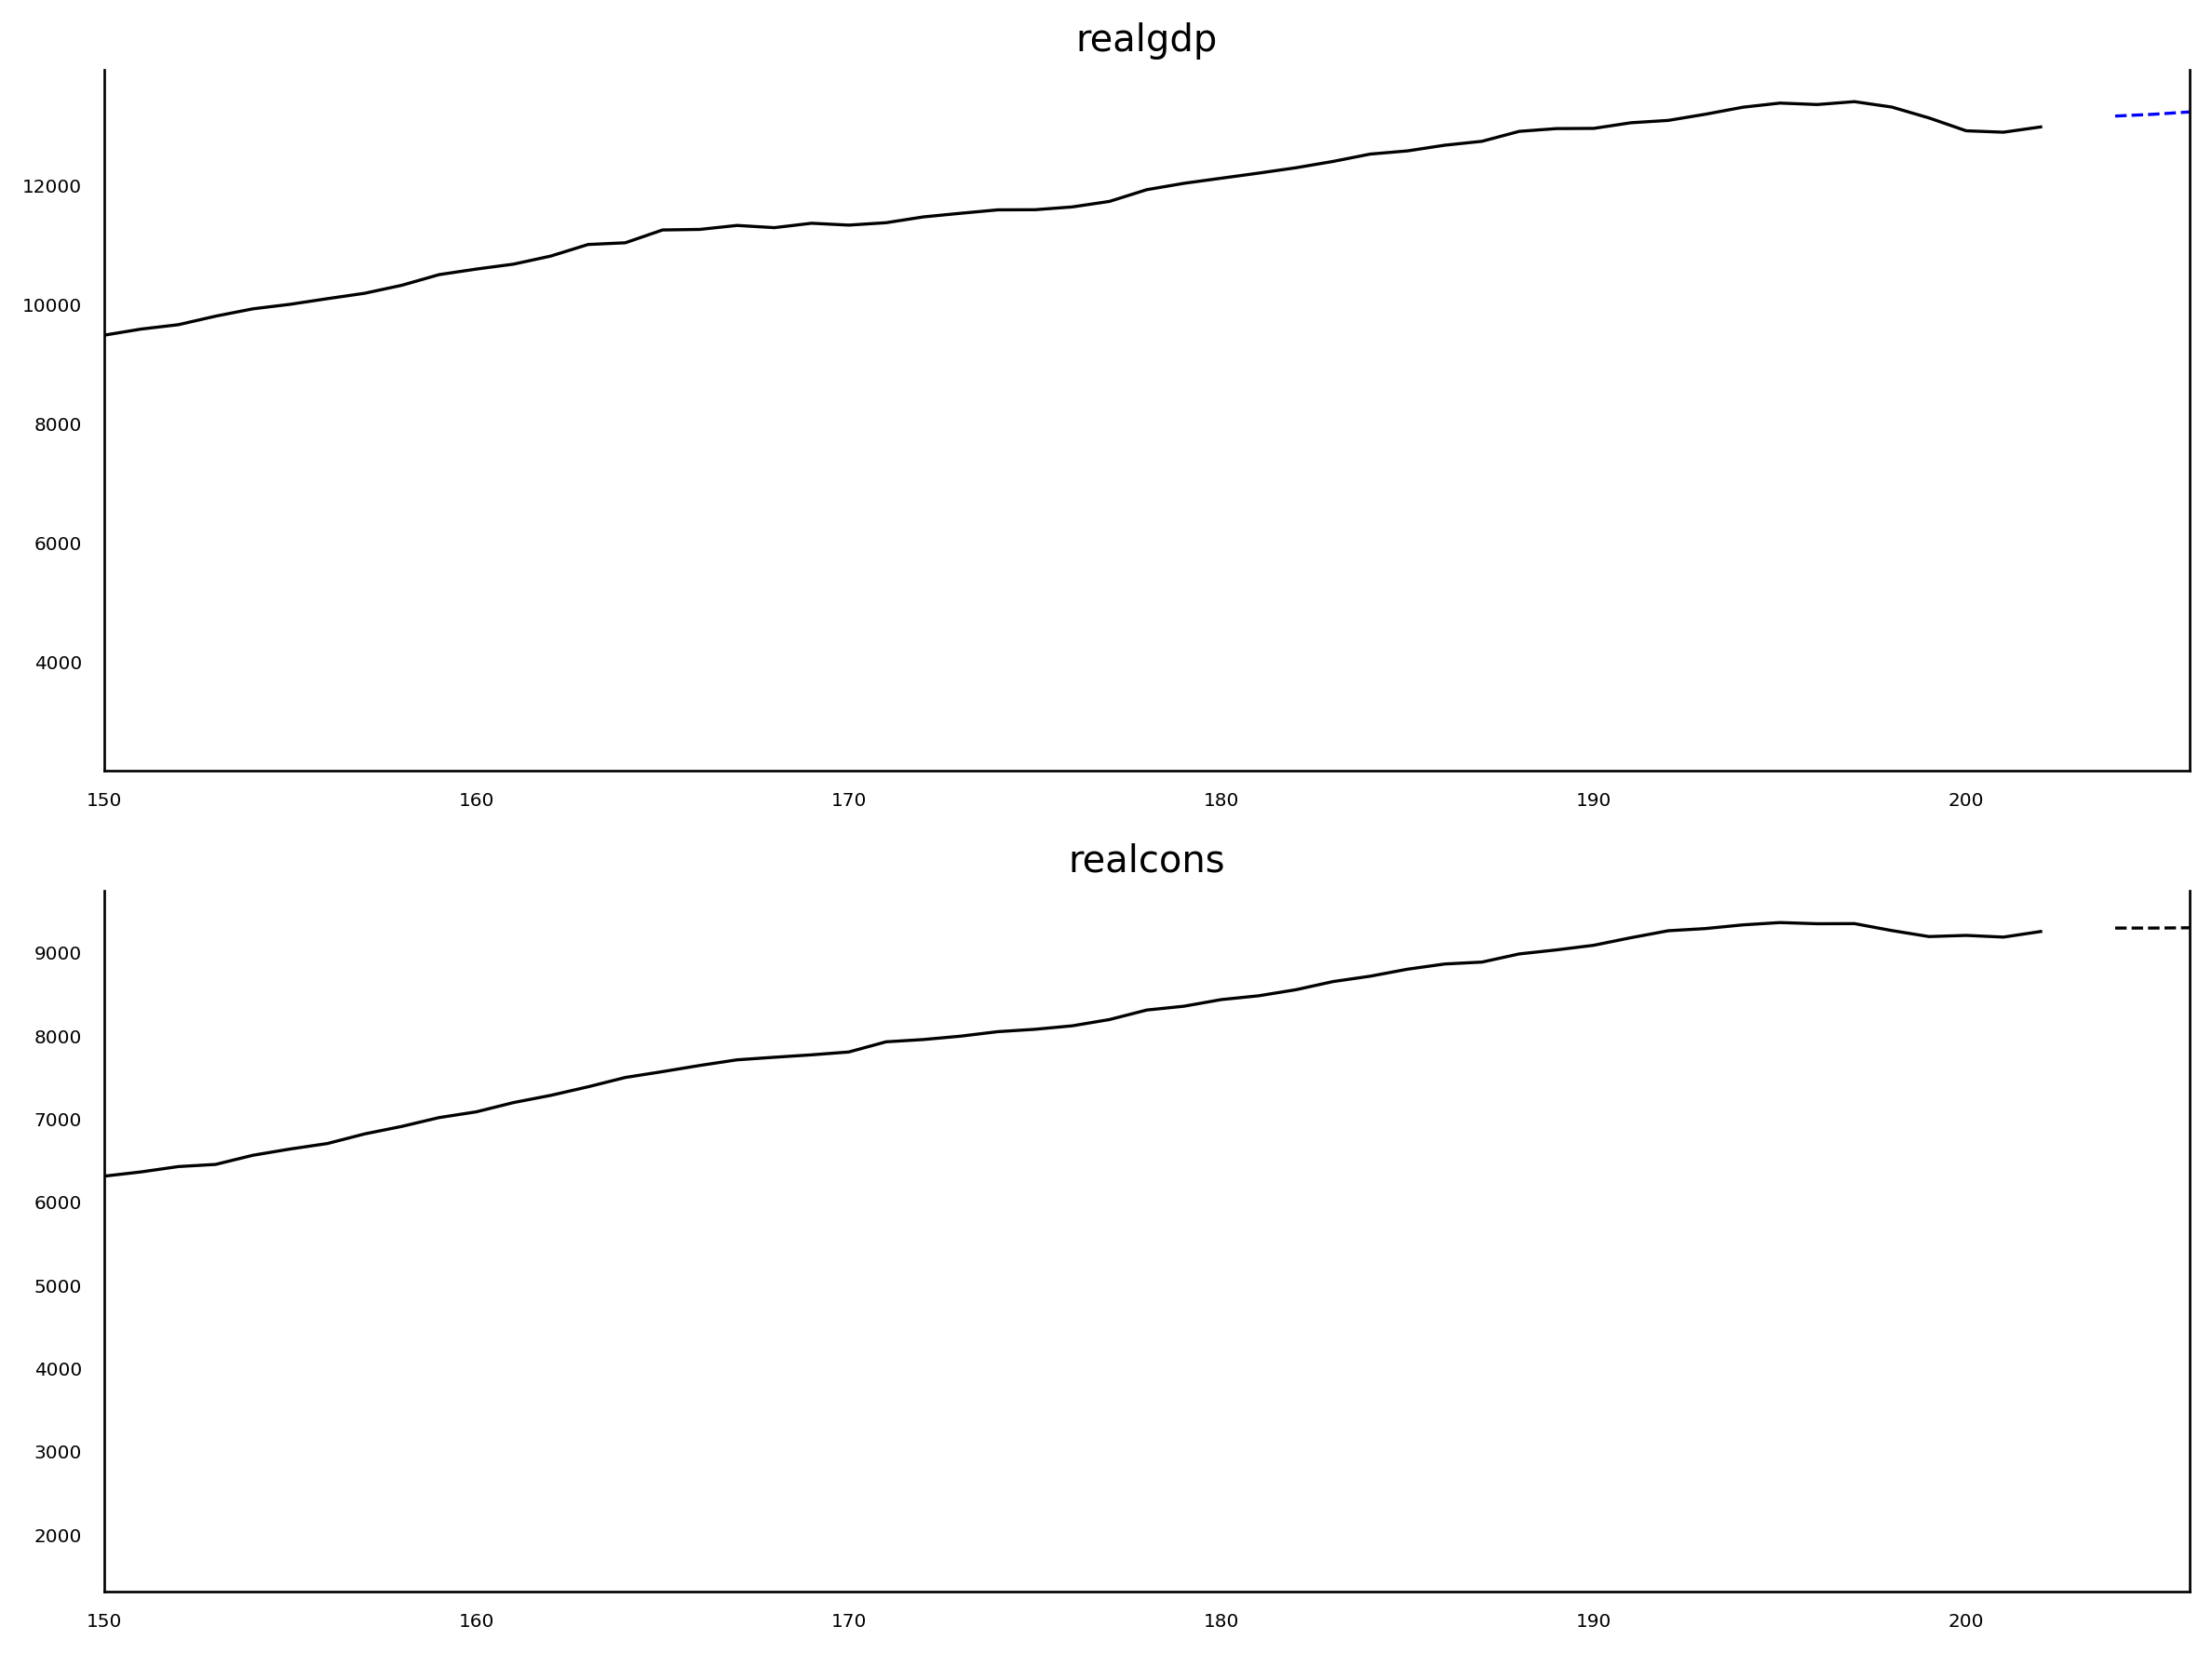

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=240)

ax1.plot(macro_data['realgdp'], color='black', linewidth=1)
ax1.plot(idx[-n_forecast:], predict.predicted_mean['realgdp'][-n_forecast:], color = 'blue', ls='--', linewidth=1)
ax1.set_title('realgdp')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.set_xlim(150, 206)
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(macro_data['realcons'], color='black', linewidth=1)
ax2.plot(idx[-n_forecast:], predict.predicted_mean['realcons'][-n_forecast:], color = 'black', ls='--', linewidth=1)
ax2.set_title('realcons')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.set_xlim(150, 206)
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

plt.tight_layout()

In [26]:
print('realcons causes realgdp?\n')
print('-------------------------------')
granger_1 = grangercausalitytests(macro_data[['realgdp', 'realcons']].diff()[1:], [12])

print('realgdp causes realcons?\n')
print('-------------------------------')
granger_2 = grangercausalitytests(macro_data[['realcons', 'realgdp']].diff()[1:], [12])

realcons causes realgdp?

-------------------------------

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=6.1144  , p=0.0000  , df_denom=165, df_num=12
ssr based chi2 test:   chi2=84.4900 , p=0.0000  , df=12
likelihood ratio test: chi2=69.8992 , p=0.0000  , df=12
parameter F test:         F=6.1144  , p=0.0000  , df_denom=165, df_num=12
realgdp causes realcons?

-------------------------------

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=2.1147  , p=0.0185  , df_denom=165, df_num=12
ssr based chi2 test:   chi2=29.2218 , p=0.0037  , df=12
likelihood ratio test: chi2=27.1813 , p=0.0073  , df=12
parameter F test:         F=2.1147  , p=0.0185  , df_denom=165, df_num=12


## VARMA

In [37]:
def optimize_VARMA(endog, parameters_list):

  """
  Returns a dataframe with parameters (p, q) and corresponding MSE

  endog - the observed variable
  parameters_list - list of (p, q) tuples
  """

  results = []

  for param in tqdm_notebook(parameters_list):
    try:
      model = VARMAX(endog, order=param).fit(disp=False)
    except:
      continue

    mse = model.mse

    results.append([param, mse])

  result_df = pd.DataFrame(results)
  result_df.columns = ['(p, q)', 'mse']

  result_df.sort_values(by='mse', inplace=True, ascending=True, ignore_index=True)

  return result_df

In [38]:
endog = macro_data[['realgdp', 'realcons']]

p = range(0, 4, 1)
q = range(0, 4, 1)

parameters = product(p, q)
parameters_list = list(parameters)

In [39]:
result_df_VARMA = optimize_VARMA(endog, parameters_list)
result_df_VARMA

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p, q)",mse
0,"(3, 1)",1.678597e+05
1,"(1, 1)",1.713525e+05
2,"(3, 2)",1.875071e+05
3,"(3, 3)",2.155955e+05
4,"(3, 0)",2.877278e+05
5,"(2, 1)",4.013724e+05
6,"(0, 1)",5.727445e+05
7,"(1, 2)",7.212921e+05
8,"(0, 3)",9.130921e+05
9,"(1, 3)",1.176751e+06


In [42]:
best_model_VARMA = VARMAX(endog, order=(3, 1))
res_VARMA = best_model_VARMA.fit(disp=False)
print(res_VARMA.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realgdp', 'realcons']   No. Observations:                  203
Model:                          VARMA(3,1)   Log Likelihood               -2000.996
                               + intercept   AIC                           4043.992
Date:                     Tue, 16 Aug 2022   BIC                           4113.569
Time:                             17:26:25   HQIC                          4072.140
Sample:                                  0                                         
                                     - 203                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.43, 0.02   Jarque-Bera (JB):          3.23, 10.48
Prob(Q):                        0.51, 0.89   Prob(JB):                   0.20, 0.01
Heteroskedasticity (H):         2.50, 2.98   Skew:                       0.1

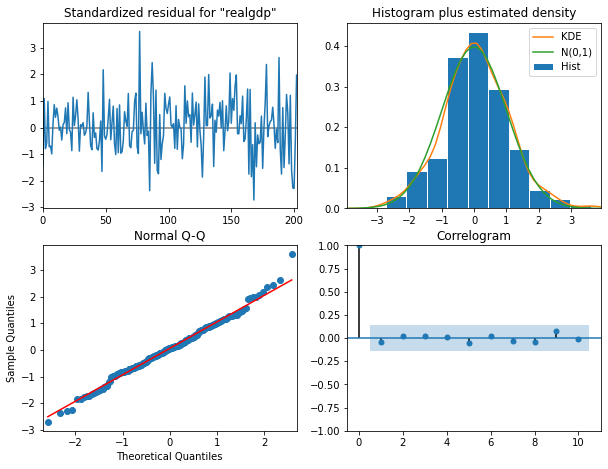

In [43]:
res_VARMA.plot_diagnostics();

In [44]:
n_forecast = 3
predict = res_VARMA.get_prediction(end=best_model_VARMA.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

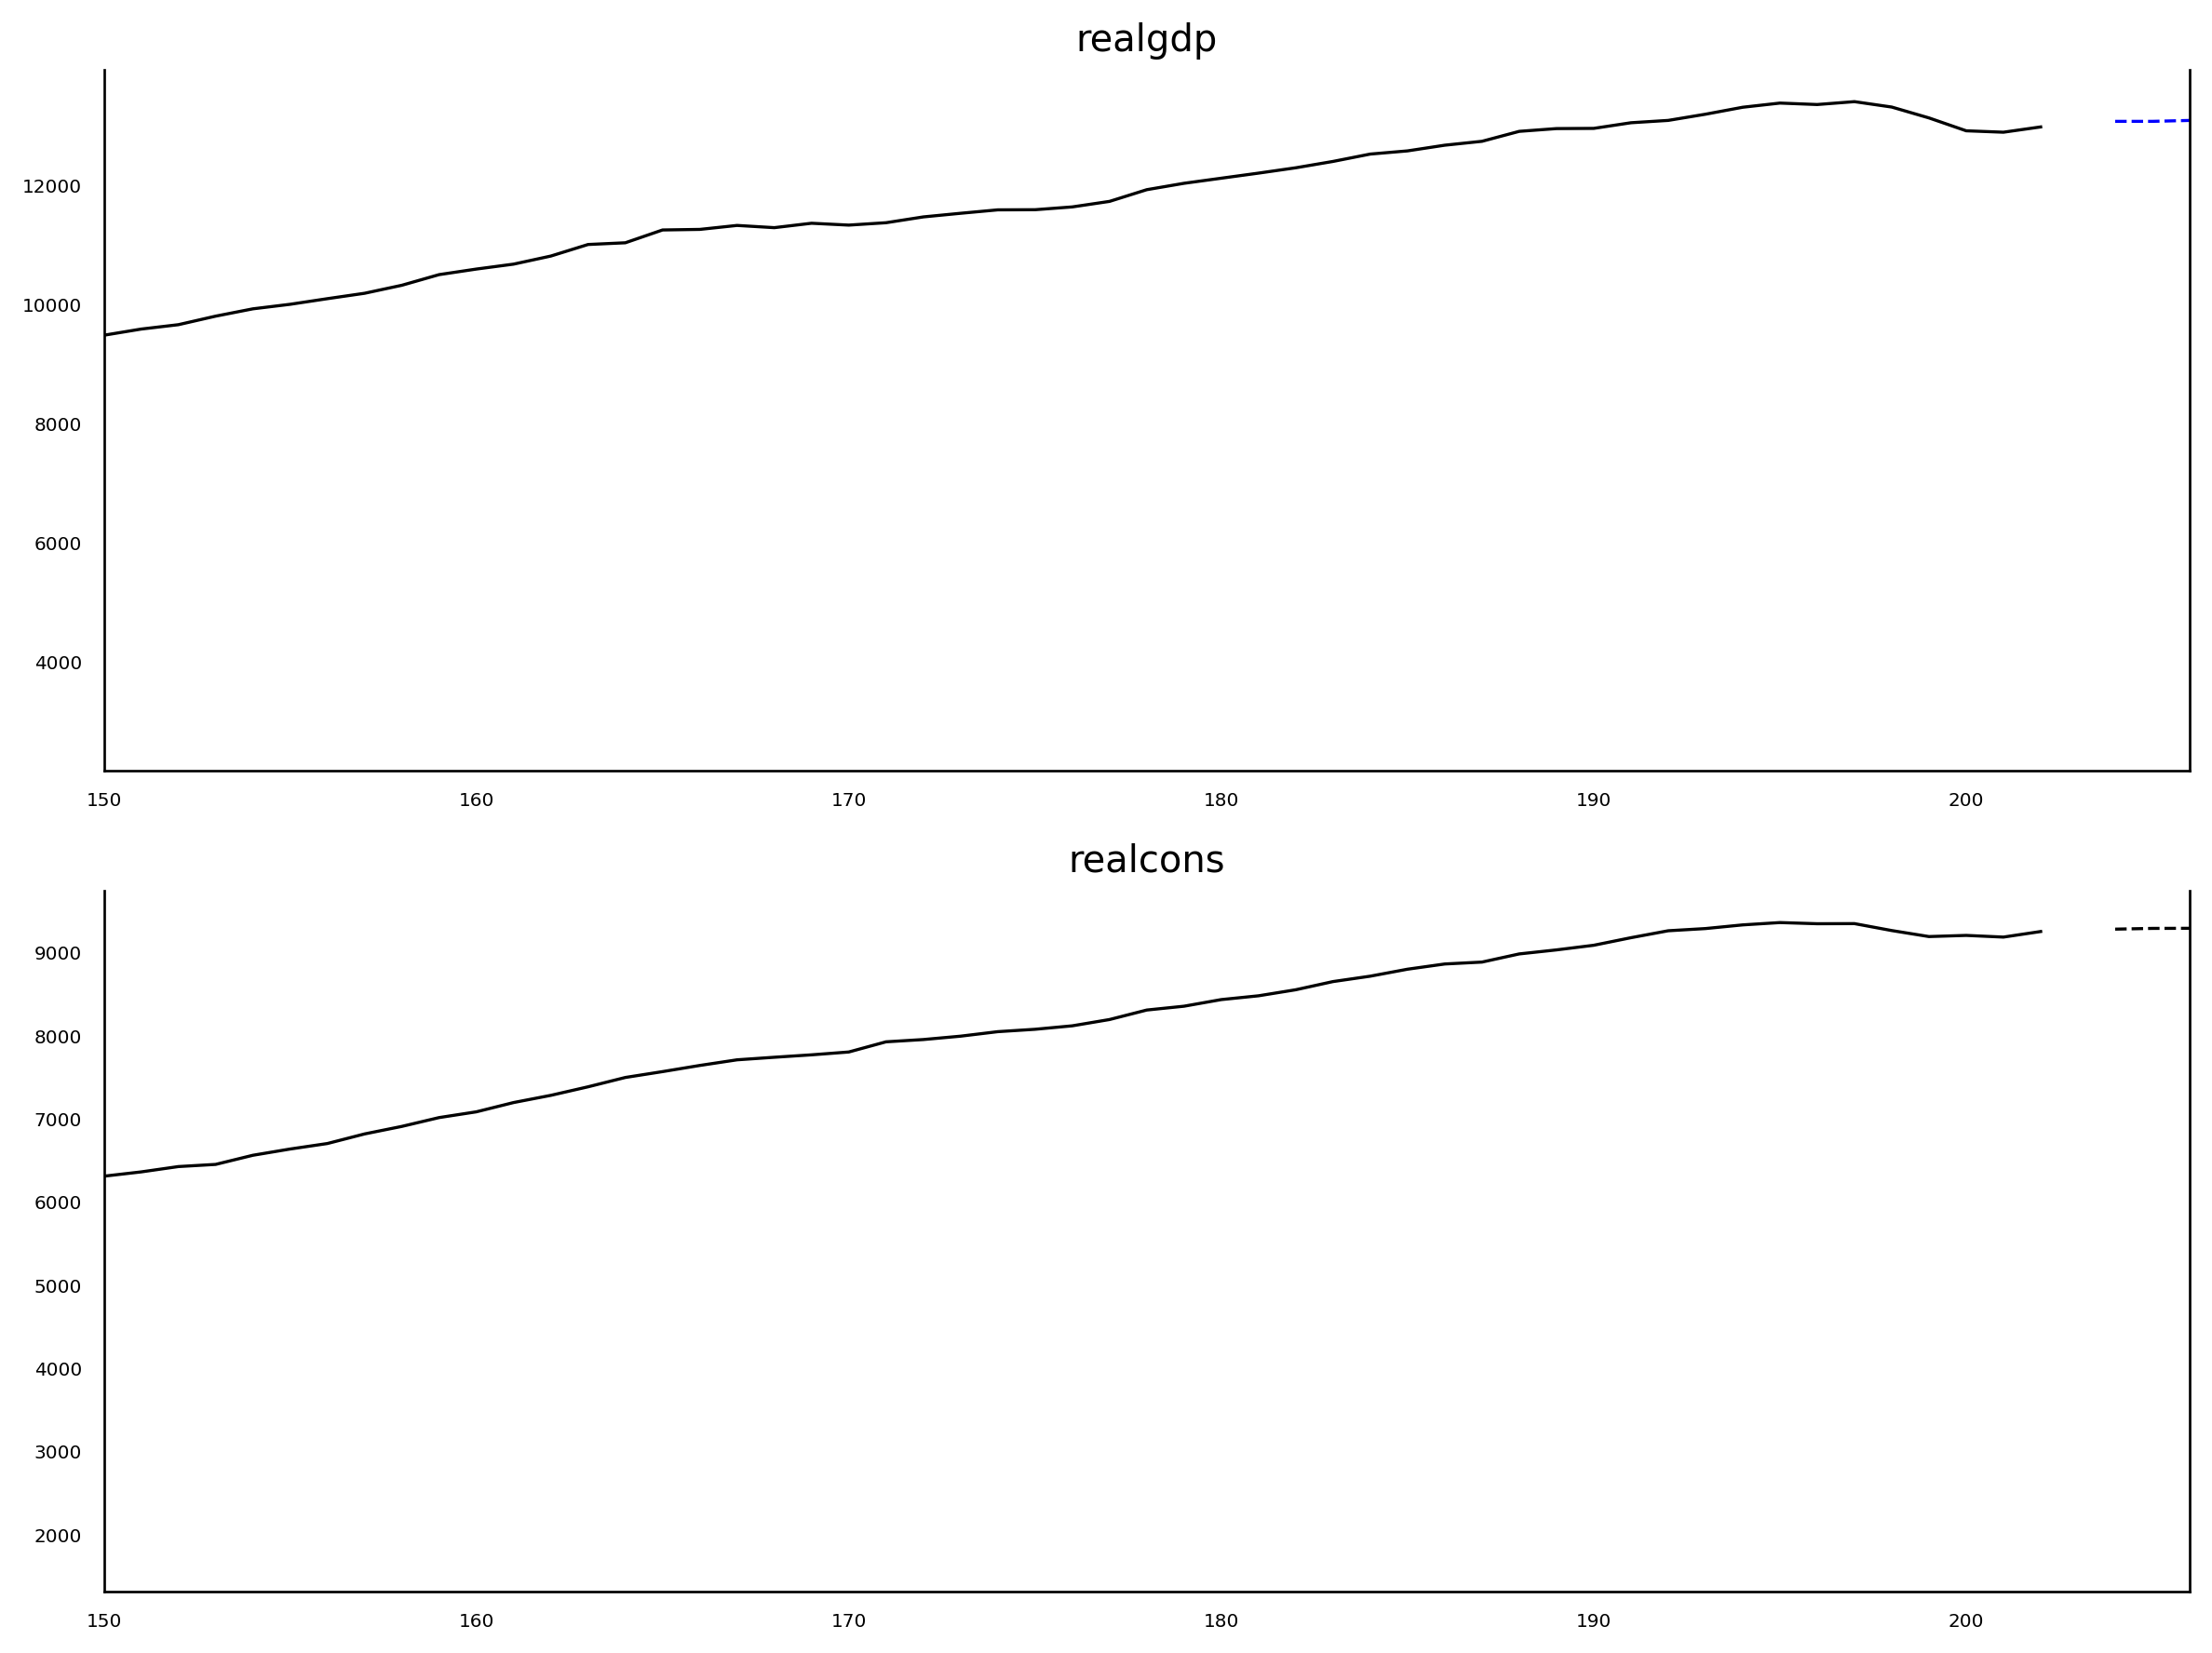

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=240)

ax1.plot(macro_data['realgdp'], color='black', linewidth=1)
ax1.plot(idx[-n_forecast:], predict.predicted_mean['realgdp'][-n_forecast:], color = 'blue', ls='--', linewidth=1)
ax1.set_title('realgdp')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.set_xlim(150, 206)
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(macro_data['realcons'], color='black', linewidth=1)
ax2.plot(idx[-n_forecast:], predict.predicted_mean['realcons'][-n_forecast:], color = 'black', ls='--', linewidth=1)
ax2.set_title('realcons')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.set_xlim(150, 206)
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

plt.tight_layout()